# Data Mining - Classification
### By John Haviland and Nathan Dilla
### CST-425
### Professor Isac Artzi
### Feb. 11, 2024


<h4> John's video: https://www.loom.com/share/d9a3987d763d4711a7ef89df305509fc?sid=c80a7fbb-8322-4c54-aa47-bb51c51ecbf0 </h4>

<h4> Nathan's video: https://www.loom.com/share/b04c6ff4be9b46908b6e71e04a8f2021</h4>

# Part 1

### Classification
How the Algorithm Works:
#
Classification is a data mining technique that assigns items in a collection to target categories or classes. The goal is to accurately predict the target class for each case in the data. The process involves training a model on a dataset with pre-defined classes and then using that model to classify new items. Algorithms used for classification include k-Nearest Neighbors, decision trees, naive Bayes, support vector machines (SVM), and neural networks.
#
Strengths:
#
Versatility: Classification algorithms can be used for a wide range of applications, from spam detection to customer segmentation.
Interpretability: Some algorithms, like decision trees, provide clear insights into how decisions are made, making them useful for understanding the decision process.
Accuracy: With sufficient training data, classification models can achieve high levels of accuracy.

Weaknesses:
#
Overfitting: If a model is too complex, it might perform well on the training data but poorly on unseen data.
Data Quality Dependence: The performance of classification algorithms heavily depends on the quality of the training data.
Imbalanced Classes: If some classes are underrepresented in the training data, the model may perform poorly on those classes.
#
Real Life example: A real-life example of classification is using customer data to identify potential loan defaulters. The dataset might include attributes like credit score, income, employment status, and loan amount. The target classes could be "will default" and "will not default." A bank could use this model to assess the risk of loan applications.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Part 2

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = './adult.csv'

Preprocess the data

In [2]:
# Give data column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
data = pd.read_csv(data_path, names=column_names, na_values=" ?", skipinitialspace=True)

# Pre-process the data
data.dropna(inplace=True)  # Handle missing values

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:  # Encode categorical variables
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

Split the data and normalize

In [3]:
# Split the data into features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Create classifiers

In [4]:
# K-Nearest-Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

make predictions

In [5]:
# Predictions
knn_predictions = knn.predict(X_test)
dt_predictions = dt.predict(X_test)

Evaluate the models

In [8]:
# Evaluation
knn_cm = confusion_matrix(y_test, knn_predictions)
dt_cm = confusion_matrix(y_test, dt_predictions)

knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Calculate sensitivity and specificity for Decision Tree Classifier
dt_sensitivity = dt_cm[0, 0] / (dt_cm[0, 0] + dt_cm[0, 1])
dt_specificity = dt_cm[1, 1] / (dt_cm[1, 0] + dt_cm[1, 1])

# Calculate sensitivity and specificity for KNN Classifier
knn_sensitivity = knn_cm[0, 0] / (knn_cm[0, 0] + knn_cm[0, 1])
knn_specificity = knn_cm[1, 1] / (knn_cm[1, 0] + knn_cm[1, 1])

print("KNN Classifier:")
print("Accuracy:", knn_accuracy)
print("Sensitivity:", knn_sensitivity)
print("Specificity:", knn_specificity)
print("Confusion Matrix:\n", knn_cm)
print(classification_report(y_test, knn_predictions))

print("\nDecision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Sensitivity:", dt_sensitivity)
print("Specificity:", dt_specificity)
print("Confusion Matrix:\n", dt_cm)
print(classification_report(y_test, dt_predictions))

KNN Classifier:
Accuracy: 0.8352525717795178
Sensitivity: 0.9091460946985026
Specificity: 0.602800763844685
Confusion Matrix:
 [[4493  449]
 [ 624  947]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4942
           1       0.68      0.60      0.64      1571

    accuracy                           0.84      6513
   macro avg       0.78      0.76      0.77      6513
weighted avg       0.83      0.84      0.83      6513


Decision Tree Classifier:
Accuracy: 0.8128358667280823
Sensitivity: 0.8700930797248078
Specificity: 0.6327180140038192
Confusion Matrix:
 [[4300  642]
 [ 577  994]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4942
           1       0.61      0.63      0.62      1571

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.75      6513
weighted avg       0.82      0.81      0.81      6513



Visualize Models

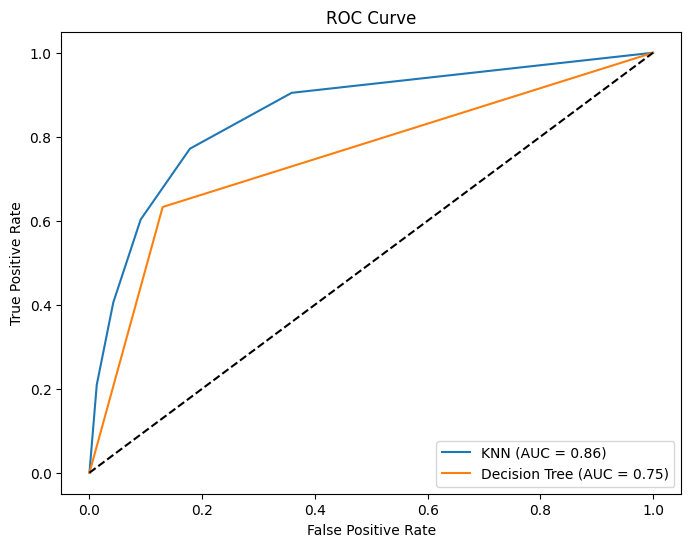

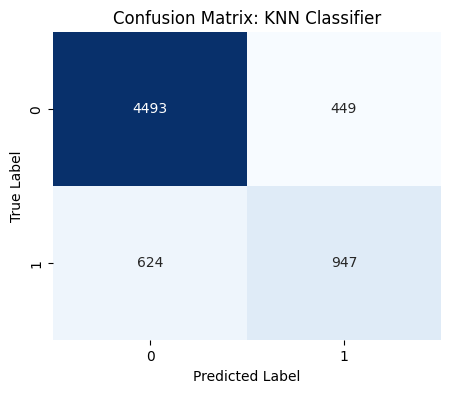

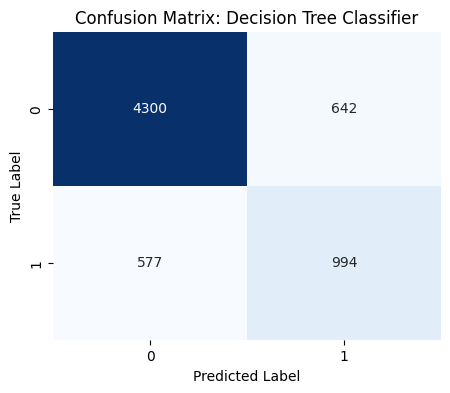

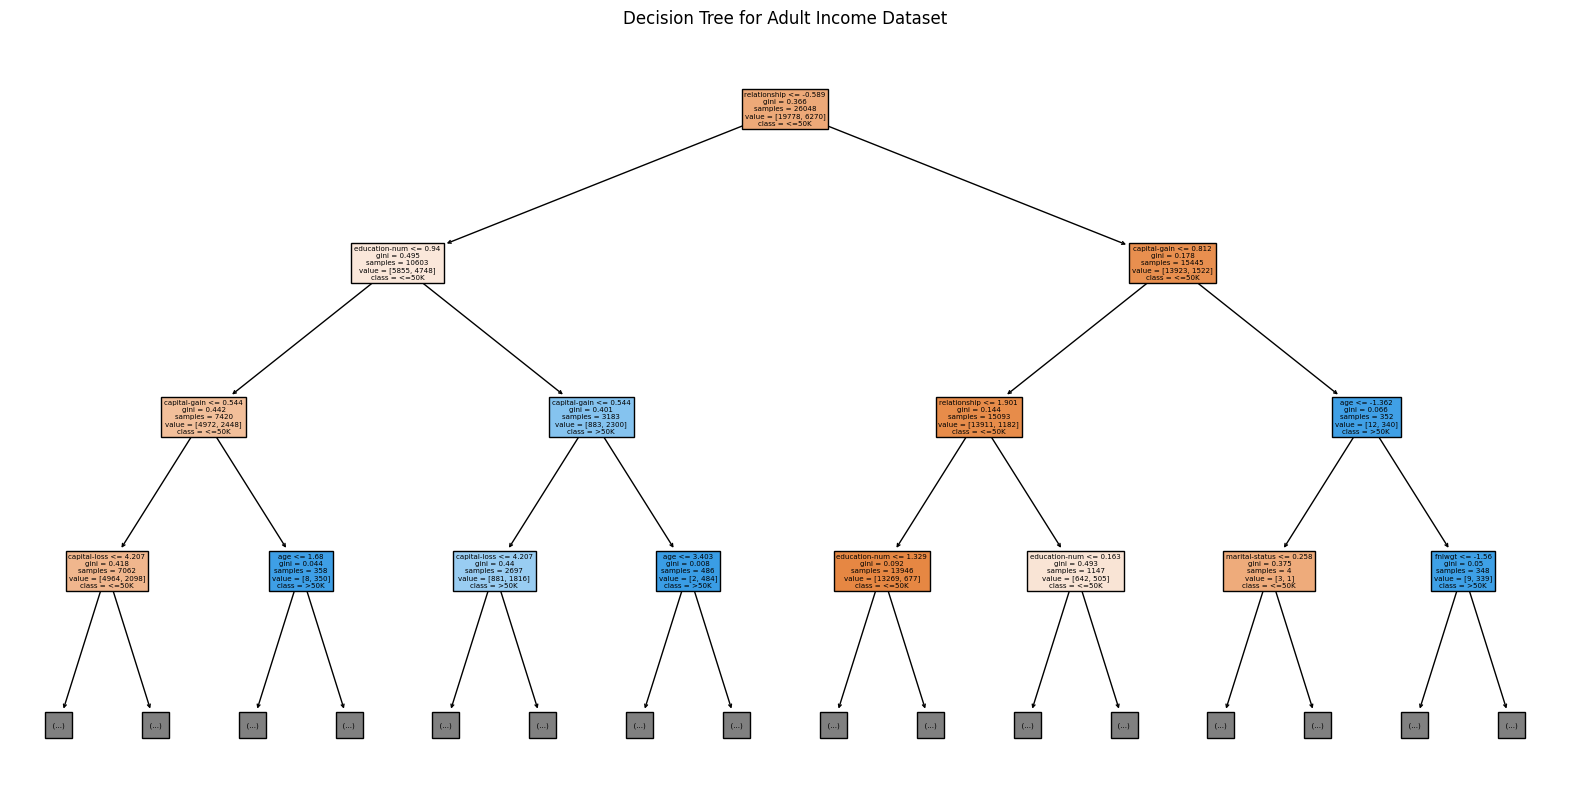

In [7]:
# ROC Curve and AUC Visualization
knn_probs = knn.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix Visualization
def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


plot_confusion_matrix(knn_cm, "KNN Classifier")
plot_confusion_matrix(dt_cm, "Decision Tree Classifier")

# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], max_depth=3)
plt.title("Decision Tree for Adult Income Dataset")
plt.show()


## Analysis of Findings

ROC Curve Explained:

An ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model at various classification thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values. The curve for both classifiers reflect a good model because ideally, ROC curves rise steeply from the origin to meet up at (1,1). However, kNN is shown to have better performance as the curve expands more steeply compared to the Decision Tree Classifier. From a technical standpoint, this means that kNN has a higher True Positive Rate as the threshold value decreases. kNN has high accuracy than the Decision Tree Classifier.

Comparing Confusion Matrices:

Both classifiers have a higher number of true negatives (TN) compared to true positives (TP), indicating that they are relatively better at correctly classifying negative instances.
The kNN classifier has a lower number of false positives (FP) but a higher number of false negatives (FN) compared to the Decision Tree classifier. This suggests that while the kNN classifier has a lower tendency to incorrectly classify negative instances as positive (resulting in a higher TN count), it may struggle more with correctly identifying positive instances (resulting in a lower TP count).
Conversely, the Decision Tree classifier has a higher number of false positives (FP) but a lower number of false negatives (FN) compared to the kNN classifier. This indicates that while the Decision Tree classifier may incorrectly classify more negative instances as positive (resulting in a lower TN count), it is more effective at correctly identifying positive instances (resulting in a higher TP count).

### Comparing Results

Accuracy: The kNN classifier achieves an accuracy of 0.835, slightly higher than the Decision Tree classifier's accuracy of 0.813. This indicates that the kNN classifier is more accurate overall in classifying instances.
#
Sensitivity (Recall): The kNN classifier has a sensitivity (recall) of 0.909, higher than the Decision Tree classifier's sensitivity of 0.870. This suggests that the kNN classifier is better at correctly identifying positive instances (higher true positive rate).
#
Specificity: Both classifiers have similar specificity values, with the kNN classifier at 0.603 and the Decision Tree classifier at 0.633. This indicates that both classifiers are relatively similar in their ability to correctly identify negative instances (higher true negative rate).
#
Precision, F1-Score, and Support: Both classifiers show differences in precision, recall, and F1-score for each class. The kNN classifier generally has higher precision and recall for both classes compared to the Decision Tree classifier.
#
Given these observations, if we prioritize sensitivity (recall) and overall accuracy, the kNN classifier might be preferred due to its higher accuracy and sensitivity values. However, if we prioritize interpretability and computational efficiency, the Decision Tree classifier could be favored despite its slightly lower performance metrics. Additionally, the choice between the two classifiers may depend on the specific requirements and constraints of the application, such as the balance between false positives and false negatives, the importance of individual performance metrics, and the interpretability of the model.


### References

Dataset: Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

ChatGPT

CS courses Padlet: https://padlet.com/isac_artzi/cs-courses-97zpvui7fpar